# Importing Libraries

In [287]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics
from tqdm import tqdm
from scipy.stats import entropy
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn import metrics

# Reading Files

In [288]:
loc = "E:/project/Parkinson's Project/CSV"

In [289]:
total_files = 0
total_controlled_patients_files = 0
total_parkinsons_patients_files = 0
totalFiles = []
Co_files = []
Pt_files = []
for files in os.listdir(loc):
    if "Pt" or "Co" in files:
        total_files = total_files + 1
        totalFiles.append(files)
    if "Co" in files:
        total_controlled_patients_files = total_controlled_patients_files + 1
        Co_files.append(files)
    if "Pt" in files:
        total_parkinsons_patients_files = total_parkinsons_patients_files + 1
        Pt_files.append(files)
print("Total numbers of files are: ",total_files)
print("Total numbers of Controlled Patients files are: ",total_controlled_patients_files)
print("Total numbers of Parkinson's Patients files are: ",total_parkinsons_patients_files)

Total numbers of files are:  306
Total numbers of Controlled Patients files are:  92
Total numbers of Parkinson's Patients files are:  214


In [290]:
dfCo = pd.read_csv(loc+ "/" + Co_files[0])
dfCo.head()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.01,199.1,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.9,79.86,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00
1,0.02,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,79.86,112.42,50.82,13.75,102.74,144.98,79.53,660.22,748.00
2,0.03,199.1,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.9,77.55,112.42,48.07,13.75,105.49,144.98,79.53,664.07,745.69
3,0.04,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,77.55,112.42,50.82,13.75,105.49,144.98,79.53,660.22,748.44
4,0.05,199.1,87.34,91.08,24.09,19.03,87.67,89.10,62.59,163.9,77.55,112.42,50.82,13.75,102.74,144.98,79.53,660.00,745.69


In [291]:
dfPt = pd.read_csv(loc + "/" + Pt_files[0])
dfPt.head()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.01,71.72,174.90,135.96,83.38,30.14,64.57,84.04,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,679.91,0.0
1,0.02,71.72,173.25,134.31,84.92,31.68,64.57,87.78,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.43,0.0
2,0.03,68.53,169.84,132.55,86.46,31.68,67.43,87.78,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.87,0.0
3,0.04,65.34,168.19,132.55,86.46,31.68,67.43,91.52,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,682.77,0.0
4,0.05,62.15,165.00,129.03,88.11,31.68,70.40,95.26,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.23,0.0


# Plotting Total Force Left and Total Force Right for a Parkinson and Controlled Patient

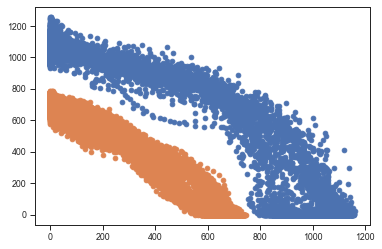

In [292]:
x = np.array([dfCo['Total_force_left']])
y = np.array(dfCo['Total_force_right'])
plt.scatter(x, y)
x = np.array(dfPt['Total_force_left'])
y = np.array(dfPt['Total_force_right'])
plt.scatter(x, y)
plt.show()

Text(0.5, 1.0, 'Left Foot Stride Force Patterns')

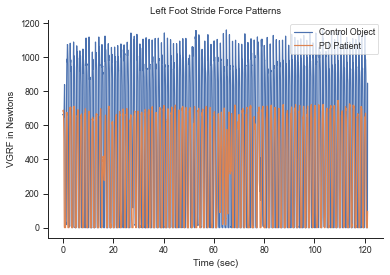

In [293]:
plt.figure()
plt.plot(dfCo['Time(sec)'], dfCo['Total_force_left'], label="Control Object")
plt.plot(dfPt['Time(sec)'], dfPt['Total_force_left'], label="PD Patient")
plt.legend(loc=1)
plt.xlabel("Time (sec)")
plt.ylabel("VGRF in Newtons")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Left Foot Stride Force Patterns")

Text(0.5, 1.0, 'Right Foot Stride Force Patterns')

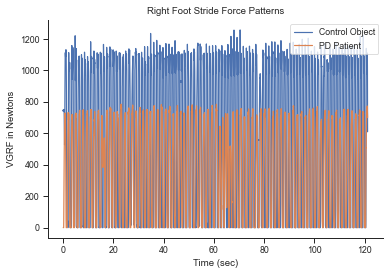

In [294]:
plt.figure()
plt.plot(dfCo['Time(sec)'], dfCo['Total_force_right'], label="Control Object" )
plt.plot(dfPt['Time(sec)'], dfPt['Total_force_right'], label = "PD Patient")
plt.legend(loc=1)
plt.xlabel("Time (sec)")
plt.ylabel("VGRF in Newtons")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Right Foot Stride Force Patterns")

# Finding Mean of Each Text File and converting a Text File to row

In [295]:
patient = []
mean_time = []
mean_VGRF_left1 = []
mean_VGRF_left2 = []
mean_VGRF_left3 = []
mean_VGRF_left4 = []
mean_VGRF_left5 = []
mean_VGRF_left6 = []
mean_VGRF_left7 = []
mean_VGRF_left8 = []
mean_VGRF_right1 = []
mean_VGRF_right2 = []
mean_VGRF_right3 = []
mean_VGRF_right4 = []
mean_VGRF_right5 = []
mean_VGRF_right6 = []
mean_VGRF_right7 = []
mean_VGRF_right8 = []
sum_ = 0

In [296]:
for files in totalFiles:
    if "Co" in files:
        patient.append(0)
    else:
        patient.append(1)
    df = pd.read_csv(loc + "/" + files)
    
    for cols in df['Time(sec)']:
        sum_ = sum_ + cols
    mean_time.append(sum_/len(df['Time(sec)']))
    sum_ = 0
    for cols in df['VGRF_left_s1']:
        sum_ = sum_ + cols
    mean_VGRF_left1.append(sum_/len(df['VGRF_left_s1']))
    sum_ = 0
    for cols in df['VGRF_left_s2']:
        sum_ = sum_ + cols
    mean_VGRF_left2.append(sum_/len(df['VGRF_left_s2']))
    sum_ = 0
    for cols in df['VGRF_left_s3']:
        sum_ = sum_ + cols
    mean_VGRF_left3.append(sum_/len(df['VGRF_left_s3']))
    sum_ = 0
    for cols in df['VGRF_left_s4']:
        sum_ = sum_ + cols
    mean_VGRF_left4.append(sum_/len(df['VGRF_left_s4']))
    sum_ = 0
    for cols in df['VGRF_left_s5']:
        sum_ = sum_ + cols
    mean_VGRF_left5.append(sum_/len(df['VGRF_left_s5']))
    sum_ = 0
    for cols in df['VGRF_left_s6']:
        sum_ = sum_ + cols
    mean_VGRF_left6.append(sum_/len(df['VGRF_left_s6']))
    sum_ = 0
    for cols in df['VGRF_left_s7']:
        sum_ = sum_ + cols
    mean_VGRF_left7.append(sum_/len(df['VGRF_left_s7']))
    sum_ = 0
    for cols in df['VGRF_left_s8']:
        sum_ = sum_ + cols
    mean_VGRF_left8.append(sum_/len(df['VGRF_left_s8']))
    sum_ = 0
    for cols in df['VGRF_right_s1']:
        sum_ = sum_ + cols
    mean_VGRF_right1.append(sum_/len(df['VGRF_right_s1']))
    sum_ = 0
    for cols in df['VGRF_right_s2']:
        sum_ = sum_ + cols
    mean_VGRF_right2.append(sum_/len(df['VGRF_right_s2']))
    sum_ = 0
    for cols in df['VGRF_right_s3']:
        sum_ = sum_ + cols
    mean_VGRF_right3.append(sum_/len(df['VGRF_right_s3']))
    sum_ = 0
    for cols in df['VGRF_right_s4']:
        sum_ = sum_ + cols
    mean_VGRF_right4.append(sum_/len(df['VGRF_right_s4']))
    sum_ = 0
    for cols in df['VGRF_right_s5']:
        sum_ = sum_ + cols
    mean_VGRF_right5.append(sum_/len(df['VGRF_right_s5']))
    sum_ = 0
    for cols in df['VGRF_right_s6']:
        sum_ = sum_ + cols
    mean_VGRF_right6.append(sum_/len(df['VGRF_right_s6']))
    sum_ = 0
    for cols in df['VGRF_right_s7']:
        sum_ = sum_ + cols
    mean_VGRF_right7.append(sum_/len(df['VGRF_right_s7']))
    sum_ = 0
    for cols in df['VGRF_right_s8']:
        sum_ = sum_ + cols
    mean_VGRF_right8.append(sum_/len(df['VGRF_right_s8']))
    sum_ = 0


# Mean Values Dataset

In [297]:
dict_of_dataframe = {
    "Patient" : patient,
    "Mean Time": mean_time,
    "Mean VGFR_left_s1": mean_VGRF_left1, "Mean VGFR_left_s2": mean_VGRF_left2, "Mean VGFR_left_s3": mean_VGRF_left3,
    "Mean VGFR_left_s4": mean_VGRF_left4, "Mean VGFR_left_s5": mean_VGRF_left5, "Mean VGFR_left_s6": mean_VGRF_left6,
    "Mean VGFR_left_s7": mean_VGRF_left7, "Mean VGFR_left_s8": mean_VGRF_left8,
    "Mean VGFR_right_s1": mean_VGRF_right1, "Mean VGFR_right_s2": mean_VGRF_right2, "Mean VGFR_right_s3": mean_VGRF_right3,
    "Mean VGFR_right_s4": mean_VGRF_right4, "Mean VGFR_right_s5": mean_VGRF_right5, "Mean VGFR_right_s6": mean_VGRF_right6,
    "Mean VGFR_right_s7": mean_VGRF_right7, "Mean VGFR_right_s8": mean_VGRF_right8}
main_df = pd.DataFrame(dict_of_dataframe)

In [298]:
main_df.head(10)

,Patient,Mean Time,Mean VGFR_left_s1,Mean VGFR_left_s2,Mean VGFR_left_s3,Mean VGFR_left_s4,Mean VGFR_left_s5,Mean VGFR_left_s6,Mean VGFR_left_s7,Mean VGFR_left_s8,Mean VGFR_right_s1,Mean VGFR_right_s2,Mean VGFR_right_s3,Mean VGFR_right_s4,Mean VGFR_right_s5,Mean VGFR_right_s6,Mean VGFR_right_s7,Mean VGFR_right_s8
0,0,60.590759,118.051940,68.692077,48.425916,43.703414,20.648383,94.384729,93.851677,32.885407,100.967355,61.528515,51.848497,70.042432,16.359854,104.850143,114.499416,43.202804
1,0,60.590759,111.420777,84.344456,67.783647,44.369387,5.277250,78.684485,28.449642,20.862919,94.473515,62.610805,59.430945,47.720293,6.488666,90.836907,55.465798,30.942615
2,0,60.590759,103.878062,84.826031,62.567225,45.874475,8.007434,71.013270,30.271631,22.709544,87.211491,70.739540,53.453065,55.558587,9.545464,83.647538,56.830314,32.571147
3,0,60.590759,87.844976,70.259019,86.646486,90.969328,12.027907,92.903315,109.522665,50.506421,115.009085,82.005218,67.853397,100.646351,28.439566,64.241570,91.184290,41.847457
4,0,60.590759,102.242404,79.036543,81.320073,98.200889,13.159388,92.903569,101.985595,47.110582,111.480607,101.130204,54.169980,107.104625,23.475233,78.174462,87.135885,39.752083
5,0,60.590759,32.261054,62.842370,59.733458,53.399572,75.651052,32.047481,63.601250,18.825931,26.838130,68.491793,56.253671,56.953766,56.845700,40.278345,67.425098,34.825321
6,0,60.590759,31.852434,61.778398,57.840384,54.903516,73.385423,35.859183,67.013429,19.272839,28.340695,67.036948,54.152942,57.643322,57.872572,42.950470,70.896452,32.921381
7,0,60.590759,65.528129,74.483144,73.039392,89.297779,27.555508,83.162487,43.612903,56.844783,57.897335,64.349501,71.198412,78.154946,48.607991,65.464224,83.840070,60.684671
8,0,60.590759,64.107987,66.046177,75.274512,90.520823,31.433213,93.542128,50.720566,62.356674,57.320584,64.607780,69.960808,79.909599,49.656041,69.585693,89.394417,63.170028
9,0,60.590759,31.374927,57.366661,55.983274,80.482129,74.296349,62.243525,77.270144,26.859598,25.892927,64.552009,54.943557,81.575739,70.034335,74.667670,91.284360,34.319828


In [299]:
main_df.tail(10)

,Patient,Mean Time,Mean VGFR_left_s1,Mean VGFR_left_s2,Mean VGFR_left_s3,Mean VGFR_left_s4,Mean VGFR_left_s5,Mean VGFR_left_s6,Mean VGFR_left_s7,Mean VGFR_left_s8,Mean VGFR_right_s1,Mean VGFR_right_s2,Mean VGFR_right_s3,Mean VGFR_right_s4,Mean VGFR_right_s5,Mean VGFR_right_s6,Mean VGFR_right_s7,Mean VGFR_right_s8
296,1,60.590759,9.800675,43.605596,50.329711,110.029946,51.060606,76.749191,70.068911,30.088649,29.766029,64.698282,106.625438,87.690197,60.692468,51.125890,74.689501,27.167440
297,1,60.590759,33.979552,83.758691,73.700971,84.527448,29.641460,68.581723,70.120434,36.247832,46.984215,79.226297,95.497211,82.120873,43.006160,51.329814,64.724906,29.853635
298,1,60.590759,37.892567,98.744053,82.766730,51.206498,41.187493,45.656427,93.033657,21.079043,44.505267,81.129067,77.618743,61.580320,57.299960,39.014807,82.577539,18.266881
299,1,60.590759,23.908252,52.373861,56.935385,44.716135,43.170824,59.079286,74.753133,28.271298,32.821856,46.398296,71.447859,61.338707,56.951206,48.148156,64.314435,23.895226
300,1,60.590759,58.680616,66.053720,34.236424,71.075078,5.636905,106.108317,78.164014,37.476023,81.413916,75.818131,42.522852,36.769738,4.842805,72.887046,129.364248,28.629338
301,1,60.590759,16.966606,50.672211,22.875271,58.176293,35.249318,47.965810,105.517151,21.397578,43.486546,68.550379,57.711103,31.341277,28.224795,46.095056,99.072628,27.853864
302,1,60.590759,32.446215,37.921397,38.830944,30.461386,30.053819,48.487733,85.376085,41.489843,28.130508,44.421110,33.491959,59.292469,24.099096,64.898430,53.896287,38.616291
303,1,60.590759,32.399393,59.714251,59.493670,58.755967,34.800975,24.376583,43.363692,13.333610,32.074540,67.940059,66.667779,72.224450,25.755132,26.385748,25.225729,14.025654
304,1,60.590759,95.909034,103.131454,81.760391,55.547186,49.690852,39.367900,59.634016,16.972851,65.252984,89.831303,61.035059,73.125927,72.106770,44.736786,80.466607,23.287739
305,1,60.590759,89.616250,47.806937,69.467224,43.235619,16.774083,67.842241,123.661468,36.907632,55.456675,31.466082,52.953372,37.505071,18.529181,71.203795,118.300425,30.450393


# Gabor Function

In [300]:
def gabor(x, sigma):
    omega = 2*np.pi*60.59
    parameter_1 = 2*np.pi*sigma
    expression_1 = 1/(math.sqrt(parameter_1))
    parameter_2 = -int((x**2/2*sigma**2))
    if parameter_2 < 0:
        length = len(str(parameter_2)) - 2
    else:
        length = len(str(parameter_2)) - 1
    parameter_2 = int(parameter_2/int(str(1)+str(0)*length))
    expression_2 = math.exp(parameter_2)
    parameter_3 = 2*np.pi*omega*x
    if x%2 == 0:
        expression_3 = math.cos(parameter_3)
    else:
        expression_3 = math.sin(parameter_3)
    gaborbor_filter = expression_1*expression_2*expression_3
    return round(gaborbor_filter,6)

In [301]:
gabor_Mean_VGFR_left_s1 = []
gabor_Mean_VGFR_left_s2 = []
gabor_Mean_VGFR_left_s3 = []
gabor_Mean_VGFR_left_s4 = []
gabor_Mean_VGFR_left_s5 = []
gabor_Mean_VGFR_left_s6 = []
gabor_Mean_VGFR_left_s7 = []
gabor_Mean_VGFR_left_s8 = []
gabor_Mean_VGFR_right_s1 = []
gabor_Mean_VGFR_right_s2 = []
gabor_Mean_VGFR_right_s3 = []
gabor_Mean_VGFR_right_s4 = []
gabor_Mean_VGFR_right_s5 = []
gabor_Mean_VGFR_right_s6 = []
gabor_Mean_VGFR_right_s7 = []
gabor_Mean_VGFR_right_s8 = []

In [302]:
for i in tqdm(range(306)):
    for j in range(1,4):
        gabor_Mean_VGFR_left_s1.append(gabor(mean_VGRF_left1[i], j))
        gabor_Mean_VGFR_left_s2.append(gabor(mean_VGRF_left2[i], j))
        gabor_Mean_VGFR_left_s3.append(gabor(mean_VGRF_left3[i], j))
        gabor_Mean_VGFR_left_s4.append(gabor(mean_VGRF_left4[i], j))
        gabor_Mean_VGFR_left_s5.append(gabor(mean_VGRF_left5[i], j))
        gabor_Mean_VGFR_left_s6.append(gabor(mean_VGRF_left6[i], j))
        gabor_Mean_VGFR_left_s7.append(gabor(mean_VGRF_left7[i], j))
        gabor_Mean_VGFR_left_s8.append(gabor(mean_VGRF_left8[i], j))
        gabor_Mean_VGFR_right_s1.append(gabor(mean_VGRF_right1[i], j))
        gabor_Mean_VGFR_right_s2.append(gabor(mean_VGRF_right2[i], j))
        gabor_Mean_VGFR_right_s3.append(gabor(mean_VGRF_right3[i], j))
        gabor_Mean_VGFR_right_s4.append(gabor(mean_VGRF_right4[i], j))
        gabor_Mean_VGFR_right_s5.append(gabor(mean_VGRF_right5[i], j))
        gabor_Mean_VGFR_right_s6.append(gabor(mean_VGRF_right6[i], j))
        gabor_Mean_VGFR_right_s7.append(gabor(mean_VGRF_right7[i], j))
        gabor_Mean_VGFR_right_s8.append(gabor(mean_VGRF_right8[i], j))
patient_ = []
for i in range(len(patient)):
    for j in range(1,4):
        patient_.append(patient[i])


100%|██████████████████████████████████████████████████████████████████████████████| 306/306 [00:00<00:00, 1330.64it/s]


# Dataset After Applying Gabor Function

In [303]:
dict_of_new_dataframe = {
    "Patient" : patient_,
    " Gabor Mean_VGFR_left_s1" :  gabor_Mean_VGFR_left_s1,
    " Gabor Mean_VGFR_left_s2" :  gabor_Mean_VGFR_left_s2,
    " Gabor Mean_VGFR_left_s3" :  gabor_Mean_VGFR_left_s3,
    " Gabor Mean_VGFR_left_s4" :  gabor_Mean_VGFR_left_s4,
    " Gabor Mean_VGFR_left_s5" :  gabor_Mean_VGFR_left_s5,
    " Gabor Mean_VGFR_left_s6" :  gabor_Mean_VGFR_left_s6,
    " Gabor Mean_VGFR_left_s7" :  gabor_Mean_VGFR_left_s7,
    " Gabor Mean_VGFR_left_s8" :  gabor_Mean_VGFR_left_s8,
    " Gabor Mean_VGFR_right_s1" : gabor_Mean_VGFR_right_s1,
    " Gabor Mean_VGFR_right_s2" : gabor_Mean_VGFR_right_s2,
    " Gabor Mean_VGFR_right_s3" : gabor_Mean_VGFR_right_s3,
    " Gabor Mean_VGFR_right_s4" : gabor_Mean_VGFR_right_s4,
    " Gabor Mean_VGFR_right_s5" : gabor_Mean_VGFR_right_s5,
    " Gabor Mean_VGFR_right_s6" : gabor_Mean_VGFR_right_s6,
    " Gabor Mean_VGFR_right_s7" : gabor_Mean_VGFR_right_s7,
    " Gabor Mean_VGFR_right_s8" : gabor_Mean_VGFR_right_s8}
gabor_filter_df = pd.DataFrame(dict_of_new_dataframe)

In [304]:
gabor_filter_df.head(5)

,Patient,Gabor Mean_VGFR_left_s1,Gabor Mean_VGFR_left_s2,Gabor Mean_VGFR_left_s3,Gabor Mean_VGFR_left_s4,Gabor Mean_VGFR_left_s5,Gabor Mean_VGFR_left_s6,Gabor Mean_VGFR_left_s7,Gabor Mean_VGFR_left_s8,Gabor Mean_VGFR_right_s1,Gabor Mean_VGFR_right_s2,Gabor Mean_VGFR_right_s3,Gabor Mean_VGFR_right_s4,Gabor Mean_VGFR_right_s5,Gabor Mean_VGFR_right_s6,Gabor Mean_VGFR_right_s7,Gabor Mean_VGFR_right_s8
0,0,0.000838,-0.016702,-0.123391,-0.000046,-0.051097,0.004158,0.006271,0.001367,0.001442,-0.140952,-0.106650,0.009316,0.127212,0.002682,-0.000973,0.000049
1,0,0.032341,-0.000011,-0.004344,-0.013028,-0.000090,0.059058,0.089069,0.019410,0.020486,-0.000247,-0.001381,0.000006,0.001648,0.038096,-0.037555,0.013930
2,0,0.000484,-0.009643,-0.071240,-0.000072,-0.080192,0.002401,0.009842,0.002145,0.002264,-0.081379,-0.061575,0.005378,0.073446,0.004210,-0.001527,0.000077
3,0,-0.000917,-0.019451,0.034965,0.000041,0.035955,0.005139,-0.007233,0.008249,-0.004403,-0.132486,0.146725,0.027069,0.053233,0.002397,-0.145527,-0.006980
4,0,-0.035419,-0.101626,0.000023,0.011586,0.000466,0.026852,-0.102731,0.000014,-0.062538,-0.000232,0.000257,0.000953,0.000093,0.034037,-0.000693,-0.099130


In [305]:
gabor_total_left_leg = []
gabor_total_right_leg = []

In [306]:
for i in range(918):
    gabor_total_left_leg.append((gabor_Mean_VGFR_left_s1[i] + gabor_Mean_VGFR_left_s2[i] + gabor_Mean_VGFR_left_s3[i] + 
                                gabor_Mean_VGFR_left_s4[i] + gabor_Mean_VGFR_left_s5[i] + gabor_Mean_VGFR_left_s6[i] + 
                                gabor_Mean_VGFR_left_s7[i] + gabor_Mean_VGFR_left_s8[i])/8)
    gabor_total_right_leg.append((gabor_Mean_VGFR_right_s1[i] + gabor_Mean_VGFR_right_s2[i] + gabor_Mean_VGFR_right_s3[i] + 
                                 gabor_Mean_VGFR_right_s4[i] + gabor_Mean_VGFR_right_s5[i] + gabor_Mean_VGFR_right_s6[i]
                                 + gabor_Mean_VGFR_right_s7[i] + gabor_Mean_VGFR_right_s8[i])/8)

In [307]:
dict_of_new_dataframe = {
    "Patient" : patient_,
    "Gabor Total Left" : gabor_total_left_leg, "Gabor Total Right" : gabor_total_right_leg}
gabor_filter_df = pd.DataFrame(dict_of_new_dataframe)

In [308]:
gabor_filter_df.head(5)

,Patient,Gabor Total Left,Gabor Total Right
0,0,-0.022325,-0.013484
1,0,0.022801,0.004373
2,0,-0.018284,-0.007388
3,0,0.007093,-0.007496
4,0,-0.025104,-0.015907


In [309]:
gabor_filter_df.tail(5)

,Patient,Gabor Total Left,Gabor Total Right
913,1,0.011528,-0.028469
914,1,-0.005657,-0.021124
915,1,-0.008024,0.046109
916,1,-0.020644,0.022750
917,1,-0.005587,0.026651


In [310]:
mean = []
standard_deviation_of_gabor_filter = []
entropy_ = []

In [311]:
for i in tqdm(range(len(gabor_total_left_leg))):
    mean.append(gabor_total_left_leg[i] + gabor_total_right_leg[i]/2),
    standard_deviation_of_gabor_filter.append(statistics.stdev([gabor_total_left_leg[i], gabor_total_right_leg[i]]))
for i in tqdm(range(len(gabor_total_left_leg))):
    entropy_.append(entropy([abs(gabor_total_left_leg[i]), abs(gabor_total_right_leg[i])]))
skew_ = gabor_filter_df.skew(axis=1, skipna=True)

100%|█████████████████████████████████████████████████████████████████████████████| 918/918 [00:00<00:00, 19955.69it/s]


In [312]:
dict_gabor_dataset = {"Mean" : mean, "Std" : standard_deviation_of_gabor_filter, "Skew" : skew_, 
                      "Entropy" : entropy_, "patient" : patient_}
gabor_dataset = pd.DataFrame(dict_gabor_dataset)

In [313]:
gabor_dataset.head(10)

,Mean,Std,Skew,Entropy,patient
0,-0.029067,0.006252,0.607755,0.662352,0
1,0.024987,0.013030,1.481078,0.441199,0
2,-0.021979,0.007705,-0.562810,0.600158,0
3,0.003345,0.010317,-0.082826,0.692766,0
4,-0.033058,0.006504,0.767777,0.667782,0
5,0.006035,0.001541,-0.245772,0.648141,0
6,0.049676,0.002353,-1.671666,0.691841,0
7,0.029299,0.007029,-0.385349,0.653978,0
8,0.020796,0.003868,-1.034282,0.675912,0
9,-0.018742,0.002028,1.418337,0.686013,0


In [314]:
gabor_dataset.tail(10)

,Mean,Std,Skew,Entropy,patient
908,0.009948,0.007282,1.731425,0.108310,1
909,0.044815,0.037580,1.714877,0.334878,1
910,0.001866,0.016506,1.728884,0.667218,1
911,0.026095,0.021607,1.726461,0.319213,1
912,-0.013237,0.001911,1.732009,0.680078,1
913,-0.002706,0.028282,1.722871,0.600558,1
914,-0.016219,0.010937,1.730689,0.515571,1
915,0.015031,0.038278,1.714307,0.419617,1
916,-0.009269,0.030684,1.721042,0.691969,1
917,0.007738,0.022795,1.725853,0.461091,1


In [315]:
X = gabor_dataset[['Mean', 'Std', 'Skew', 'Entropy']]
y = gabor_dataset['patient']

In [316]:
accuracy_ = []
precision_ = []
recall_ = []
specificity_ = []
sensitivity_ = []
classifiers_list = ["SVM", "Logistic Regression", "Naive Bayes", "Stochastic Gradient Descent", "KNN", "Decision Tree", "Random Forest"]

# SVM

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', C = 11, degree = 3, coef0= 0.001, gamma='auto')
svclassifier.fit(X_train, y_train)

SVC(C=11, coef0=0.001, gamma='auto', kernel='linear')

In [318]:
svm_y_pred = svclassifier.predict(X_test)

In [319]:
print("Accuracy:",str(metrics.accuracy_score(y_test, svm_y_pred) * 100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, svm_y_pred) * 100)
print("Precision:",str(metrics.precision_score(y_test, svm_y_pred) * 100)+"%")
precision_.append(metrics.precision_score(y_test, svm_y_pred) * 100)
print("Recall:",str(metrics.recall_score(y_test, svm_y_pred) * 100)+"%")
recall_.append(metrics.recall_score(y_test, svm_y_pred) * 100)

Accuracy: 99.45652173913044%
Precision: 99.25373134328358%
Recall: 100.0%


In [320]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svm_y_pred))
print(classification_report(y_test,svm_y_pred))

[[ 50   1]
 [  0 133]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.99      1.00      1.00       133

    accuracy                           0.99       184
   macro avg       1.00      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



In [321]:
tn, fp, fn, tp = confusion_matrix(y_test, svm_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print ("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print ("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  98.0392156862745%
Sensitivity:  100.0%


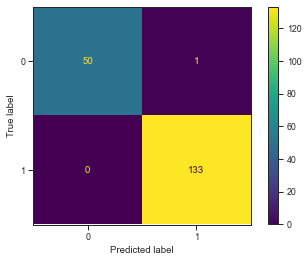

In [322]:
plot_confusion_matrix(svclassifier, X_test, y_test)  
plt.show() 

# Logistic Regression

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty= 'l1', dual= False, solver= 'liblinear', C= 100)
logreg.fit(X_train,y_train)

C:\Users\Python\include\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [324]:
logreg_y_pred = logreg.predict(X_test)

In [325]:
print("Accuracy:",str(metrics.accuracy_score(y_test, logreg_y_pred)*100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, logreg_y_pred)*100)
print("Precision:",str(metrics.precision_score(y_test, logreg_y_pred)*100)+"%")
precision_.append(metrics.precision_score(y_test, logreg_y_pred)*100)
print("Recall:",str(metrics.recall_score(y_test, logreg_y_pred)*100)+"%")
recall_.append(metrics.recall_score(y_test, logreg_y_pred)*100)

Accuracy: 98.36956521739131%
Precision: 97.85714285714285%
Recall: 100.0%


In [326]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,logreg_y_pred))
print(classification_report(y_test,logreg_y_pred))

[[ 44   3]
 [  0 137]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.98      1.00      0.99       137

    accuracy                           0.98       184
   macro avg       0.99      0.97      0.98       184
weighted avg       0.98      0.98      0.98       184



In [327]:
tn, fp, fn, tp = confusion_matrix(y_test, logreg_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print ("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print ("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  93.61702127659575%
Sensitivity:  100.0%


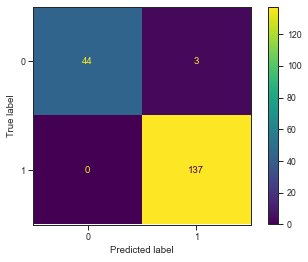

In [328]:
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show() 

# Naive Bayes

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 72)
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(abs(X_train), y_train)

MultinomialNB()

In [330]:
nbs_y_pred = nbs.predict(X_test)

In [331]:
print("Accuracy:",str(metrics.accuracy_score(y_test, nbs_y_pred)*100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, nbs_y_pred)*100)
print("Precision:",str(metrics.precision_score(y_test, nbs_y_pred)*100)+"%")
precision_.append(metrics.precision_score(y_test, nbs_y_pred)*100)
print("Recall:",str(metrics.recall_score(y_test, nbs_y_pred)*100)+"%")
recall_.append(metrics.recall_score(y_test, nbs_y_pred)*100)

Accuracy: 78.80434782608695%
Precision: 78.80434782608695%
Recall: 100.0%


In [332]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,nbs_y_pred))
print(classification_report(y_test,nbs_y_pred))

[[  0  39]
 [  0 145]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.79      1.00      0.88       145

    accuracy                           0.79       184
   macro avg       0.39      0.50      0.44       184
weighted avg       0.62      0.79      0.69       184



C:\Users\Python\include\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [333]:
tn, fp, fn, tp = confusion_matrix(y_test, nbs_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print ("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print ("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  0.0%
Sensitivity:  100.0%


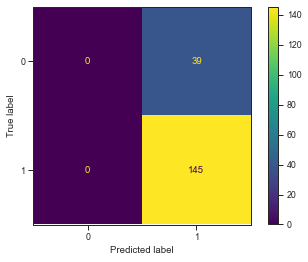

In [334]:
plot_confusion_matrix(nbs, X_test, y_test)  
plt.show() 

# stochastic gradient descent

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha=0.001, n_iter_no_change=1000, loss='log', penalty='l2', n_jobs=-1)
sgd.fit(X_train, y_train)

C:\Users\Python\include\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(alpha=0.001, loss='log', n_iter_no_change=1000, n_jobs=-1)

In [336]:
sgd_y_pred = sgd.predict(X_test)

In [337]:
print("Accuracy:",str(metrics.accuracy_score(y_test, sgd_y_pred)*100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, sgd_y_pred)*100)
print("Precision:",str(metrics.precision_score(y_test, sgd_y_pred)*100)+"%")
precision_.append(metrics.precision_score(y_test, sgd_y_pred)*100)
print("Recall:",str(metrics.recall_score(y_test, sgd_y_pred)*100)+"%")
recall_.append(metrics.recall_score(y_test, sgd_y_pred)*100)

Accuracy: 96.19565217391305%
Precision: 95.07042253521126%
Recall: 100.0%


In [338]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,sgd_y_pred))
print(classification_report(y_test,sgd_y_pred))

[[ 42   7]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        49
           1       0.95      1.00      0.97       135

    accuracy                           0.96       184
   macro avg       0.98      0.93      0.95       184
weighted avg       0.96      0.96      0.96       184



In [339]:
tn, fp, fn, tp = confusion_matrix(y_test, sgd_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  85.71428571428571%
Sensitivity:  100.0%


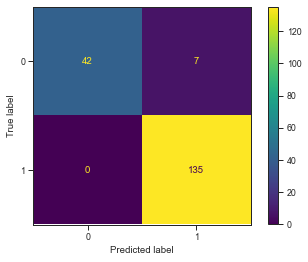

In [340]:
plot_confusion_matrix(sgd, X_test, y_test)  
plt.show() 

# KNN

In [341]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [342]:
knn_y_pred = knn.predict(X_test)

In [343]:
print("Accuracy:",str(metrics.accuracy_score(y_test, knn_y_pred)*100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, knn_y_pred)*100)
print("Precision:",str(metrics.precision_score(y_test, knn_y_pred)*100)+"%")
precision_.append(metrics.precision_score(y_test, knn_y_pred)*100)
print("Recall:",str(metrics.recall_score(y_test, knn_y_pred)*100)+"%")
recall_.append(metrics.recall_score(y_test, knn_y_pred)*100)

Accuracy: 97.82608695652173%
Precision: 99.24812030075188%
Recall: 97.77777777777777%


In [344]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,knn_y_pred))
print(classification_report(y_test,knn_y_pred))

[[ 48   1]
 [  3 132]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.99      0.98      0.99       135

    accuracy                           0.98       184
   macro avg       0.97      0.98      0.97       184
weighted avg       0.98      0.98      0.98       184



In [345]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print ("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print ("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  97.95918367346938%
Sensitivity:  97.77777777777777%


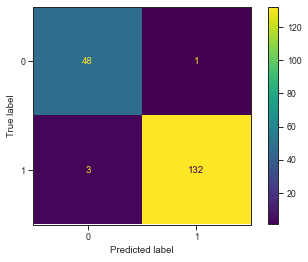

In [346]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show() 


# Decision Tree 

In [347]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=2, max_leaf_nodes=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)

In [348]:
dtree_y_pred = dtree.predict(X_test)

In [349]:
print("Accuracy:",str(metrics.accuracy_score(y_test, dtree_y_pred)*100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, dtree_y_pred)*100)
print("Precision:",str(metrics.precision_score(y_test, dtree_y_pred)*100)+"%")
precision_.append(metrics.precision_score(y_test, dtree_y_pred)*100)
print("Recall:",str(metrics.recall_score(y_test, dtree_y_pred)*100)+"%")
recall_.append(metrics.recall_score(y_test, dtree_y_pred)*100)

Accuracy: 98.91304347826086%
Precision: 99.25925925925925%
Recall: 99.25925925925925%


In [350]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,dtree_y_pred))
print(classification_report(y_test,dtree_y_pred))

[[ 48   1]
 [  1 134]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.99      0.99      0.99       135

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



In [351]:
tn, fp, fn, tp = confusion_matrix(y_test, dtree_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print ("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print ("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  97.95918367346938%
Sensitivity:  99.25925925925925%


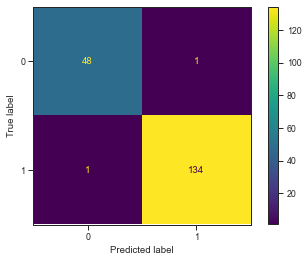

In [352]:
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show() 

# Random Forest


In [353]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 10)
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_split=2, min_samples_leaf=1)
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [354]:
rfm_y_pred = rfm.predict(X_test)

In [355]:
print("Accuracy:",str(metrics.accuracy_score(y_test, rfm_y_pred)*100)+"%")
accuracy_.append(metrics.accuracy_score(y_test, rfm_y_pred)*100)
print("Precision:",str(metrics.precision_score(y_test, rfm_y_pred)*100)+"%")
precision_.append(metrics.precision_score(y_test, rfm_y_pred)*100)
print("Recall:",str(metrics.recall_score(y_test, rfm_y_pred)*100)+"%")
recall_.append(metrics.recall_score(y_test, rfm_y_pred)*100)

Accuracy: 99.45652173913044%
Precision: 99.26470588235294%
Recall: 100.0%


In [356]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rfm_y_pred))
print(classification_report(y_test,rfm_y_pred))

[[ 48   1]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.99      1.00      1.00       135

    accuracy                           0.99       184
   macro avg       1.00      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



In [357]:
tn, fp, fn, tp = confusion_matrix(y_test, rfm_y_pred).ravel()
specificity = tn / float(tn+fp)
sensitivity = (tp / float(tp + fn))
print ("Specificity: ",str(specificity*100)+"%")
specificity_.append(specificity*100)
print ("Sensitivity: ",str(sensitivity*100)+"%")
sensitivity_.append(sensitivity*100)

Specificity:  97.95918367346938%
Sensitivity:  100.0%


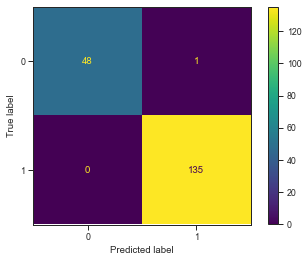

In [358]:
plot_confusion_matrix(rfm, X_test, y_test)  
plt.show() 

# ANN

In [359]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import seed
import tensorflow as tf

In [360]:
from numpy.random import seed
seed(16)
tf.random.set_seed(2)

In [361]:
model = Sequential()
model.add(Dense(2, input_dim=4, activation='relu'))
model.add(Dense(1, activation='relu'))

In [362]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [363]:
model.fit(X_train, y_train, epochs=150, batch_size=5)
y_pred= model.predict(X_test)

Epoch 1/150
147/147 [==============================] - 2s 2ms/step - loss: 1.5827 - accuracy: 0.8674
Epoch 2/150
147/147 [==============================] - 0s 2ms/step - loss: 1.4692 - accuracy: 0.8878
Epoch 3/150
147/147 [==============================] - 0s 2ms/step - loss: 1.4227 - accuracy: 0.8931
Epoch 4/150
147/147 [==============================] - 0s 2ms/step - loss: 0.9706 - accuracy: 0.8999
Epoch 5/150
147/147 [==============================] - 0s 2ms/step - loss: 0.8010 - accuracy: 0.9242
Epoch 6/150
147/147 [==============================] - 0s 2ms/step - loss: 0.7515 - accuracy: 0.9311
Epoch 7/150
147/147 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.9365
Epoch 8/150
147/147 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.9524
Epoch 9/150
147/147 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.9411
Epoch 10/150
147/147 [==============================] - 0s 2ms/step - loss: 0.4660 - accura

In [364]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [365]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9783
Accuracy: 97.83


# LSTM

In [366]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import seed
import tensorflow as tf

In [367]:
from numpy.random import seed
seed(16)
tf.random.set_seed(2)

In [368]:
model_lstm = Sequential()
model_lstm.add(LSTM(2, input_dim=4, activation='relu'))
model_lstm.add(Dense(1, activation='relu'))

In [369]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [370]:
model_lstm.fit(X_train, y_train, epochs=150, batch_size=5)
y_pred_lstm= model_lstmtm.predict(X_test)

Epoch 1/150


ValueError: in user code:

    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Akshay Dileep\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_9 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 4)


In [ ]:
model_lstm.summary()

In [ ]:
_, accuracy = model_lstm.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# Graphs

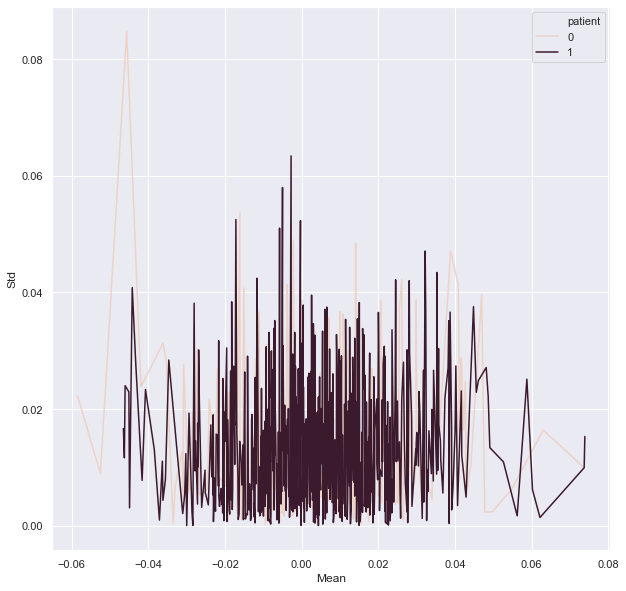

In [371]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))

# Plot the responses for different events and regions
sns.lineplot(x="Mean", y="Std", data=gabor_dataset, 
             hue="patient",palette="ch:8.5,15.9"
             )

<Figure size 1080x360 with 0 Axes>

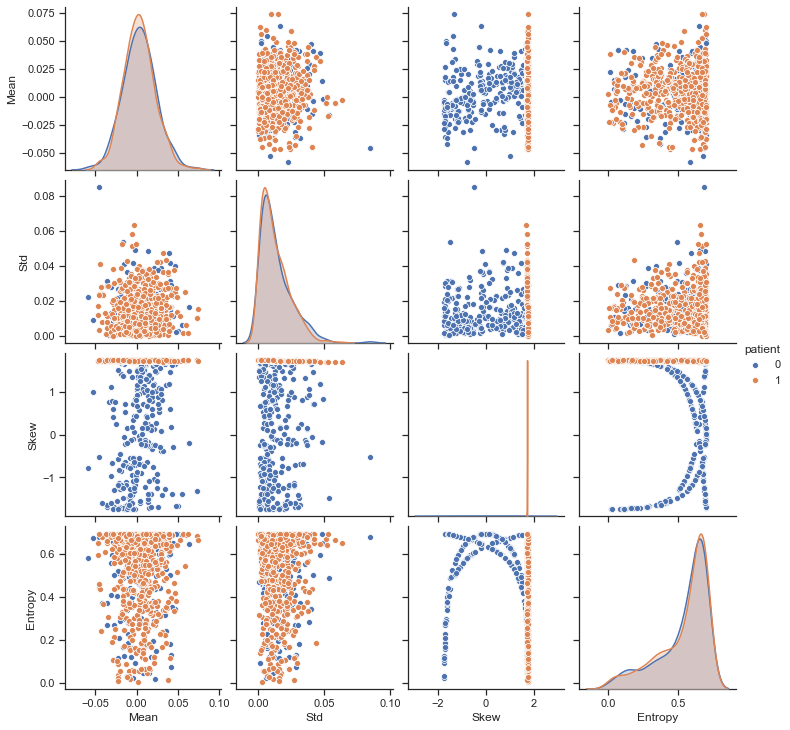

In [372]:
plt.figure(figsize=(15,5))
sns.set(style="ticks")
sns.pairplot(gabor_dataset, hue='patient')

# Accuracy, Prediction, Recall, Specificity, Sensitivity

In [373]:
df_classifiers = {"Classifiers" : classifiers_list, "Accuracy" : accuracy_, "Precision" : precision_, "Recall" : recall_,
                 "Specificity" : specificity_, "Sensitivity" : sensitivity_}
df_classifiers = pd.DataFrame(df_classifiers)

In [374]:
df_classifiers


,Classifiers,Accuracy,Precision,Recall,Specificity,Sensitivity
0,SVM,99.456522,99.253731,100.000000,98.039216,100.000000
1,Logistic Regression,98.369565,97.857143,100.000000,93.617021,100.000000
2,Naive Bayes,78.804348,78.804348,100.000000,0.000000,100.000000
3,Stochastic Gradient Descent,96.195652,95.070423,100.000000,85.714286,100.000000
4,KNN,97.826087,99.248120,97.777778,97.959184,97.777778
5,Decision Tree,98.913043,99.259259,99.259259,97.959184,99.259259
6,Random Forest,99.456522,99.264706,100.000000,97.959184,100.000000


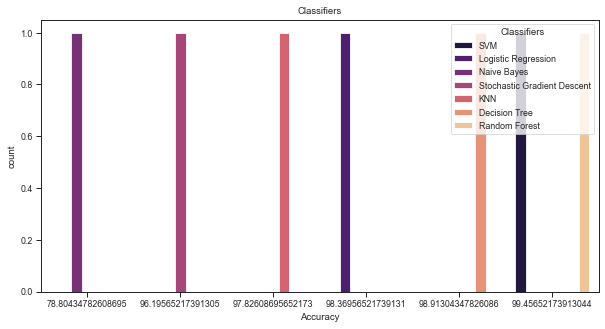

In [375]:
sns.set_context('paper')
# create plot
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Accuracy', hue = 'Classifiers', data = df_classifiers, palette = 'magma')
plt.title('Classifiers')
plt.show()